## Assignment 1 Getting your Feet Wet with Coding for Data Analysis and Modeling


### The purpose of this assignment is to get started coding!  Its alright if you have struggles, if you ask your classmates or me.  
### I am available on the Discord Server in the Professors corner and of course by email and in class. 

###  Deadline: Wednesday 10/11 at midnight. 

### Problem #1 
#### Make an array x containing 200 random numbers (samples) drawn from a normal distribution with a mean of 0.25 and a standard deviation of and plot a histogram. Don't forget to set the random number seed.  



In [18]:
import numpy as np
from numpy import random 
myseed = 1234
rng = np.random.default_rng(seed = myseed)
x = rng.normal(.25, 1, 200)



### Problem #2  
#### Find the mean, median, 25%, 75% and standard deviation of the array you created in Problem 1

In [19]:
xmean = np.mean(x)
print('xmean = ' ,xmean)
xmedian = np.median(x)
print('xmedian = ' ,xmedian)
x_25 = np.percentile(x,25)*100
print('x_25 = ' ,x_25)
x_75 = np.percentile(x,75)*100
print('x_75 = ' ,x_75)
xstd = np.std(x)
print('xstd = ' ,xstd)


xmean =  0.3493512337340174
xmedian =  0.3784974142627954
x_25 =  -34.28570360706031
x_75 =  108.45990376814451
xstd =  1.0781809145649481


### Problem #3 
#### Compute the cumulative sum of the array x (there is a numpy function that does htis) and store it in a variable w.  Make a plot of the number of samples versus w. 

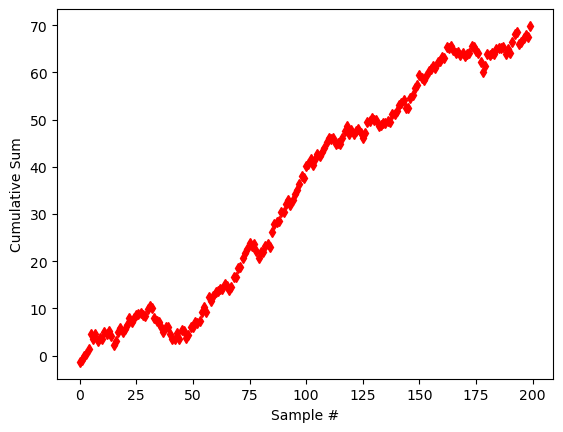

In [20]:
w = np.cumsum(x)
from matplotlib import pyplot as plt
plt.plot(w, 'rd', ms=5);
plt.xlabel('Sample #')
plt.ylabel('Cumulative Sum')
plt.show()

### Problem #4 
#### Find the sample number where w first exceeds 10. Save this to a variable called rt.  NOTE: There exceeds a remote possibility that you never cross 10 in 200 samples.  If this happens increase the number of samples from 200 to 300.  

## The datafile ReactionTimeData.csv is for use in Problem 5 and 6.  You can load it into python using pandas. This is data from a perceptual discrimination Reaction Time + EEG experiment with 3 condition labeled 'Easy', 'Medium', 'Hard'.  The variable Correct indicates 1 if the subject got it right and 0 if the subject got it wrong.  Reaction Time is in units of milliseconds

### Problem 5 
#### Choose a subject (make a parameter which is the subject number than can be easily changed to run your code again on a different subject) Label the graphs with the subject number. 
#### a. make a histogram of the RT for an individual subject, showing all 3 difficulty conditions in a single graph.
#### b. Make an bar plot with an error that shows the reaction time means for each condition  and for correct and incorrect trials. The errorbar should show the standard deviation.  

In [36]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

data = pd.read_csv('ReactionTimeData.csv')
subject = np.array(data['Subject'])
s1 = np.array(subject == 1) 
reactiontime = np.array(data['ReactionTime'])
reactiontimes1 = np.array (reactiontime [s1])
condition = np.array(data['Condition']) 
conditions1 = np.array(condition [s1])
condition_labels = ['Easy','Middle','Hard']



In [22]:

reactiontimes1_c1 = np.array (reactiontimes1[conditions1 == 'Easy'])
reactiontimes1_c2 = np.array (reactiontimes1[conditions1 == 'Medium'])
reactiontimes1_c3 = np.array (reactiontimes1[conditions1 == 'Hard'])


In [23]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd


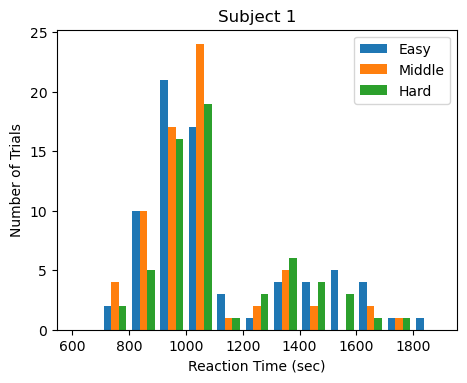

In [37]:
all_rts = list()
all_rts.append(reactiontimes1_c1)
all_rts.append(reactiontimes1_c2)
all_rts.append(reactiontimes1_c3)
bins = np.arange(600,2000,100)
fig = plt.figure(figsize = (4,3))
ax = fig.add_axes([0,0,1,1])
ax.hist(all_rts,bins)  #I sent the list containing all 3 arrays. 
ax.set_xlabel('Reaction Time (sec)')
ax.set_ylabel('Number of Trials')
ax.set_title('Subject 1')
ax.legend(labels = condition_labels)#notice in the legend command, i can put the labels here.  
plt.show()

1129.5135135135135
1044.485294117647
1125.1935483870968
[1024.0, 1012.0, 1042.0]


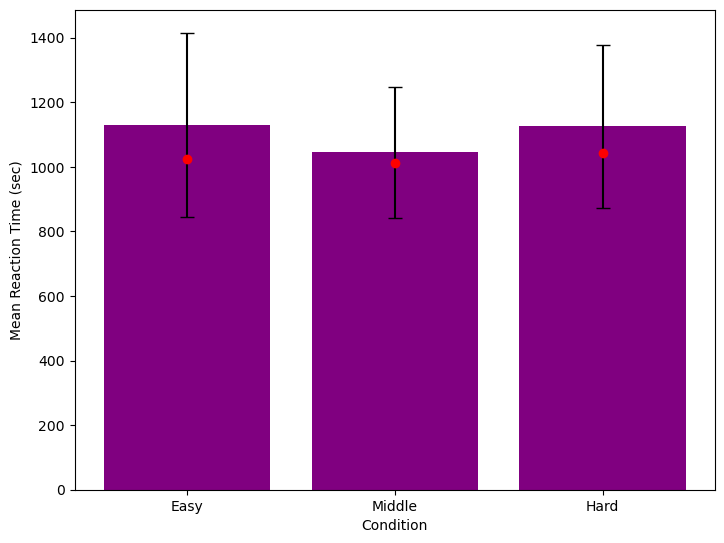

In [41]:

#### b. Make an bar plot with an error that shows the reaction time means for each condition and for correct and incorrect trials. The errorbar should show the standard deviation.  


mean_rts1c1 = np.mean(reactiontimes1_c1)
print (mean_rts1c1)
mean_rts1c2 = np.mean(reactiontimes1_c2)
print (mean_rts1c2)
mean_rts1c3 = np.mean(reactiontimes1_c3)
print (mean_rts1c3)

all_means = list()
all_means.append(mean_rts1c1)
all_means.append(mean_rts1c2)
all_means.append(mean_rts1c3)

std_rts1c1 = np.std(reactiontimes1_c1)
std_rts1c2 = np.std(reactiontimes1_c2)
std_rts1c3 = np.std(reactiontimes1_c3)

all_stds = list()
all_stds.append(std_rts1c1)
all_stds.append(std_rts1c2)
all_stds.append(std_rts1c3)

all_medians = list()
all_medians.append(np.median(reactiontimes1_c1)) 
all_medians.append(np.median(reactiontimes1_c2))
all_medians.append(np.median(reactiontimes1_c3))
print(all_medians)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(condition_labels,all_means,color = 'purple', yerr = all_stds,capsize = 5)
ax.bar(condition_labels,all_means,color = 'purple', yerr = all_stds,capsize = 5)
ax.plot(condition_labels, all_medians,'ro')
ax.set_xlabel('Condition')
ax.set_ylabel('Mean Reaction Time (sec)')
plt.show()



### Problem 6 
#### a. Calculate the mean reaction time for each subject in each condition.  
#### b. Make a histogram that shows the distribution of mean RT across subjects,showing all 3 conditions in a single graph.  
#### c.  Repeat (b) for the 25%, 50%, and 75%. Do the graphs show the same differences between conditions? 
#### d. Calculate the accuracy for each subject in each condition (accuracy is the proportion they get correct).  Visualize the accuracy in each condition for all the subjects in 1 graph.  
#### d.  What is your qualitiative opinion on the differences in reaction time and accuracy between conditions and subjects.   

In [28]:
#a. 
rt = np.array(data['ReactionTime'])
subject = np.array (data['Subject'])
condition = np.array (data['Condition'])
correct = np.array (data['Correct'])

In [35]:

# create a list for all subject means 
mu_condE = list() 
for 
# append the loop for each subject mean into the list of all subject means 
rtx = np.mean(rt[(subject ==2) & (condition =='Easy')])
print (rtx)

756.5625


## accuracy would be the the percent of what they got correct 
## make a loop for each subject # correct, append it to a total list
